In [156]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [271]:
pair_ids = np.int_(np.loadtxt("../data/summary_ids_TNG300-1.dat"))
subhalo_ids = np.int_(np.loadtxt("../data/summary_subhalo_ids_TNG300-1.dat"))
pec_vel = np.loadtxt("../data/summary_vcm_TNG300-1.dat")

In [272]:
len(pair_ids)

10850

In [273]:
subhalo_ids

array([[ 933074, 1496815],
       [ 968418, 1918669],
       [ 970661, 1967706],
       ...,
       [2052554, 1920661],
       [2062729, 1639909],
       [2065653, 1952221]])

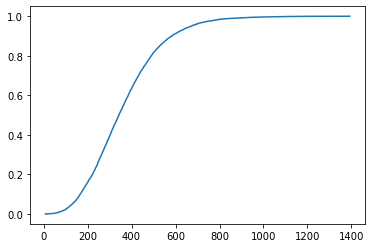

In [274]:
plt.plot(np.sort(pec_vel), np.linspace(0, 1, len(pec_vel)))

In [275]:
halo_structure_file = "../../TNG/TNG300-1/halo_structure/halo_structure_099.hdf5"
hf = h5py.File(halo_structure_file, 'r')
halo_structure_A = {}
halo_structure_B = {}
for k in hf.keys():
    if k not in ['Header','GroupFlag']:
        print(k)
        if k=='sigma_1D':
            tmp = np.array(hf.get(k))
            A = tmp[:,0]
            B = tmp[:,1]
            C = tmp[:,2]
            X = np.sqrt(((A-C)**2 + (B-C)**2 + (A-B)**2)/(3.0*(A**2 + B**2 + C**2)))
            tmp = X.copy()
        elif k=='Mean_vel':
            tmp = np.array(hf.get(k))
            A = tmp[:,0]
            B = tmp[:,1]
            C = tmp[:,2]
            X = np.sqrt(A**2 + B**2 + C**2)
            tmp = X.copy()
        else:
            tmp = np.array(hf.get(k))
        halo_structure_A[k] = tmp[pair_ids[:,0]]
        halo_structure_B[k] = tmp[pair_ids[:,1]]
        print(np.shape(tmp))
for i in range(len(halo_structure_A['q'])):
    m_A = halo_structure_A['M200c'][i]
    m_B = halo_structure_B['M200c'][i]
    if m_A > m_B: # swap. A should always be the less massive halo
        tmpid = subhalo_ids[i,0]
        subhalo_ids[i,0] = subhalo_ids[i,1]
        subhalo_ids[i,1] = tmpid
        for k in halo_structure_A.keys():
            tmp = halo_structure_A[k][i]
            halo_structure_A[k][i] = halo_structure_B[k][i]
            halo_structure_B[k][i] = tmp
hf.close()

E_s
(17625892,)
M200c
(17625892,)
M_acc_dyn
(17625892,)
Mean_vel
(17625892,)
R0p9
(17625892,)
a_form
(17625892,)
c200c
(17625892,)
f_mass_Cen
(17625892,)
q
(17625892,)
q_vel
(17625892,)
s
(17625892,)
s_vel
(17625892,)
sigma_1D
(17625892,)
sigma_3D
(17625892,)


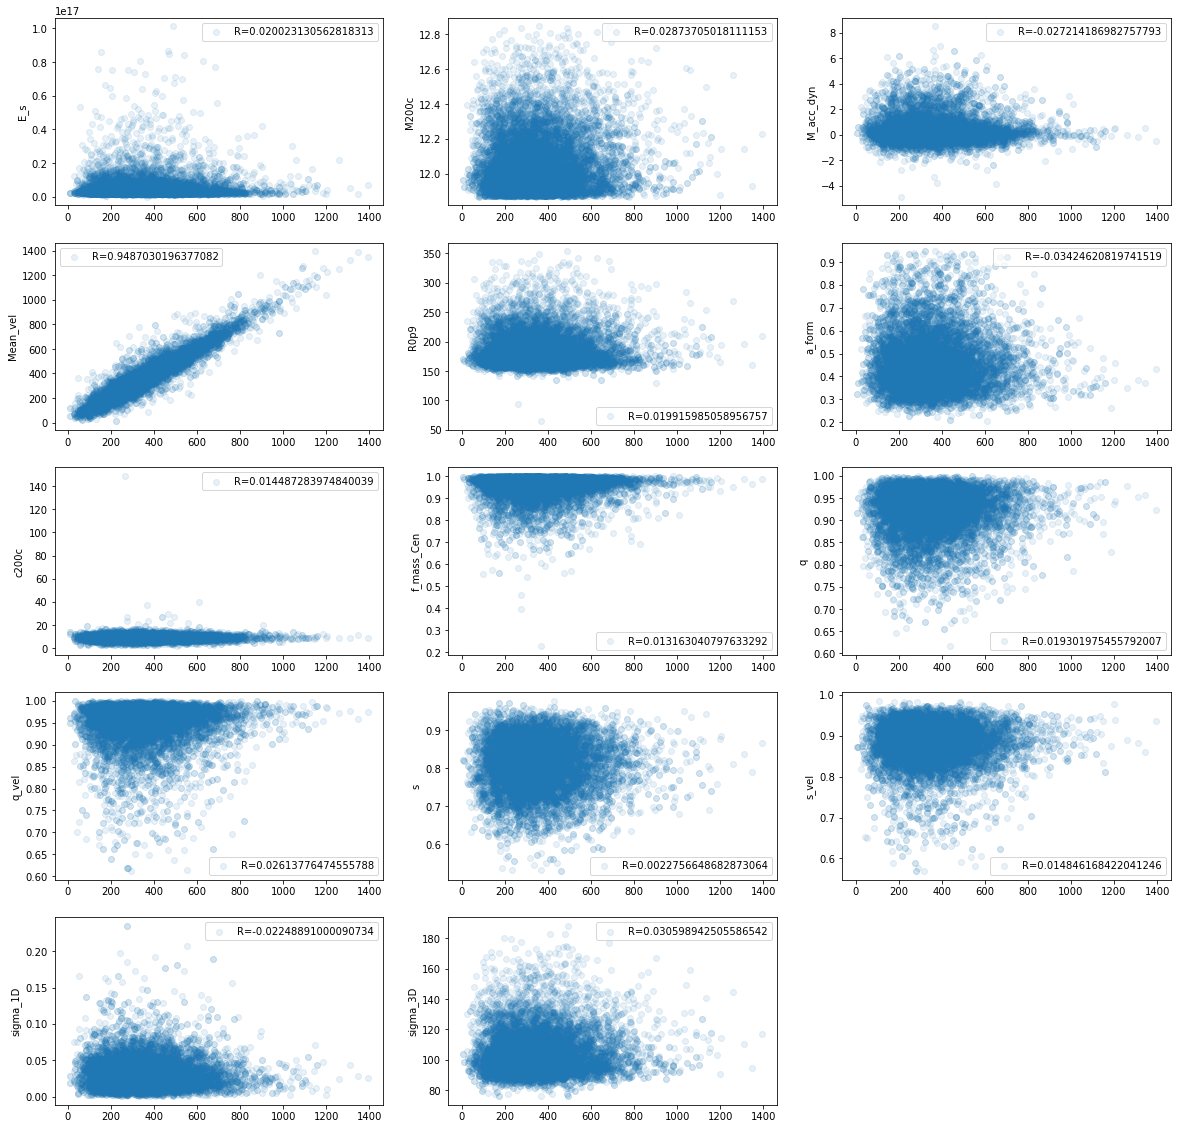

In [276]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(halo_structure_A.keys()):
    probe = halo_structure_A[k]
    ii = ~np.isnan(probe)
    R = np.corrcoef(pec_vel[ii], halo_structure_A[k][ii])
    plt.subplot(5,3, i_k+1)
    plt.scatter(pec_vel, halo_structure_A[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

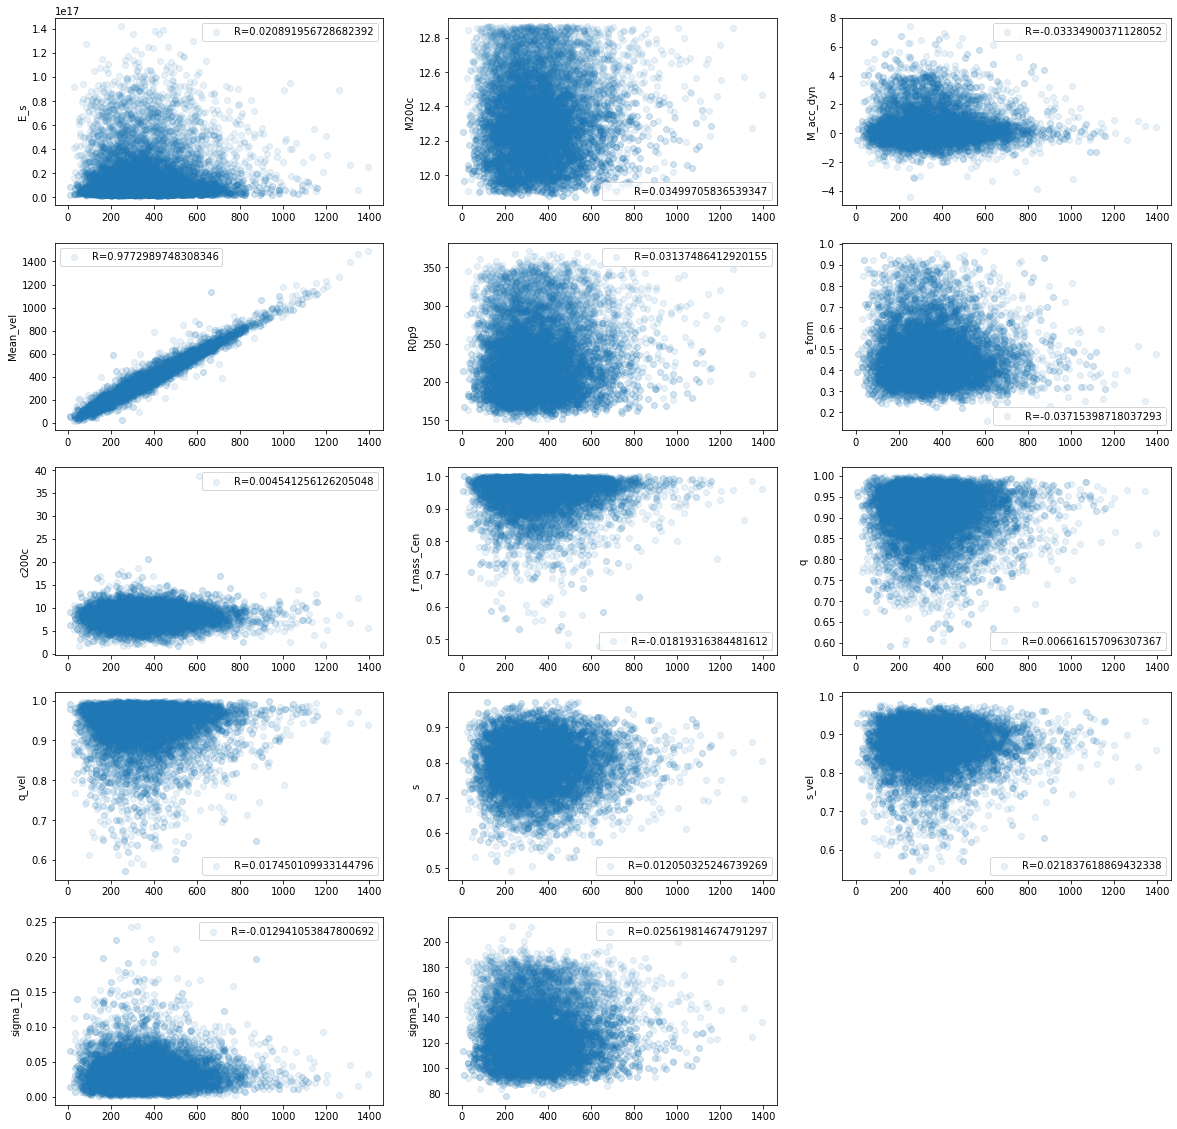

In [277]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(halo_structure_B.keys()):
    probe = halo_structure_B[k]
    ii = ~np.isnan(probe)
    R = np.corrcoef(pec_vel[ii], halo_structure_B[k][ii])
    plt.subplot(5,3, i_k+1)
    plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

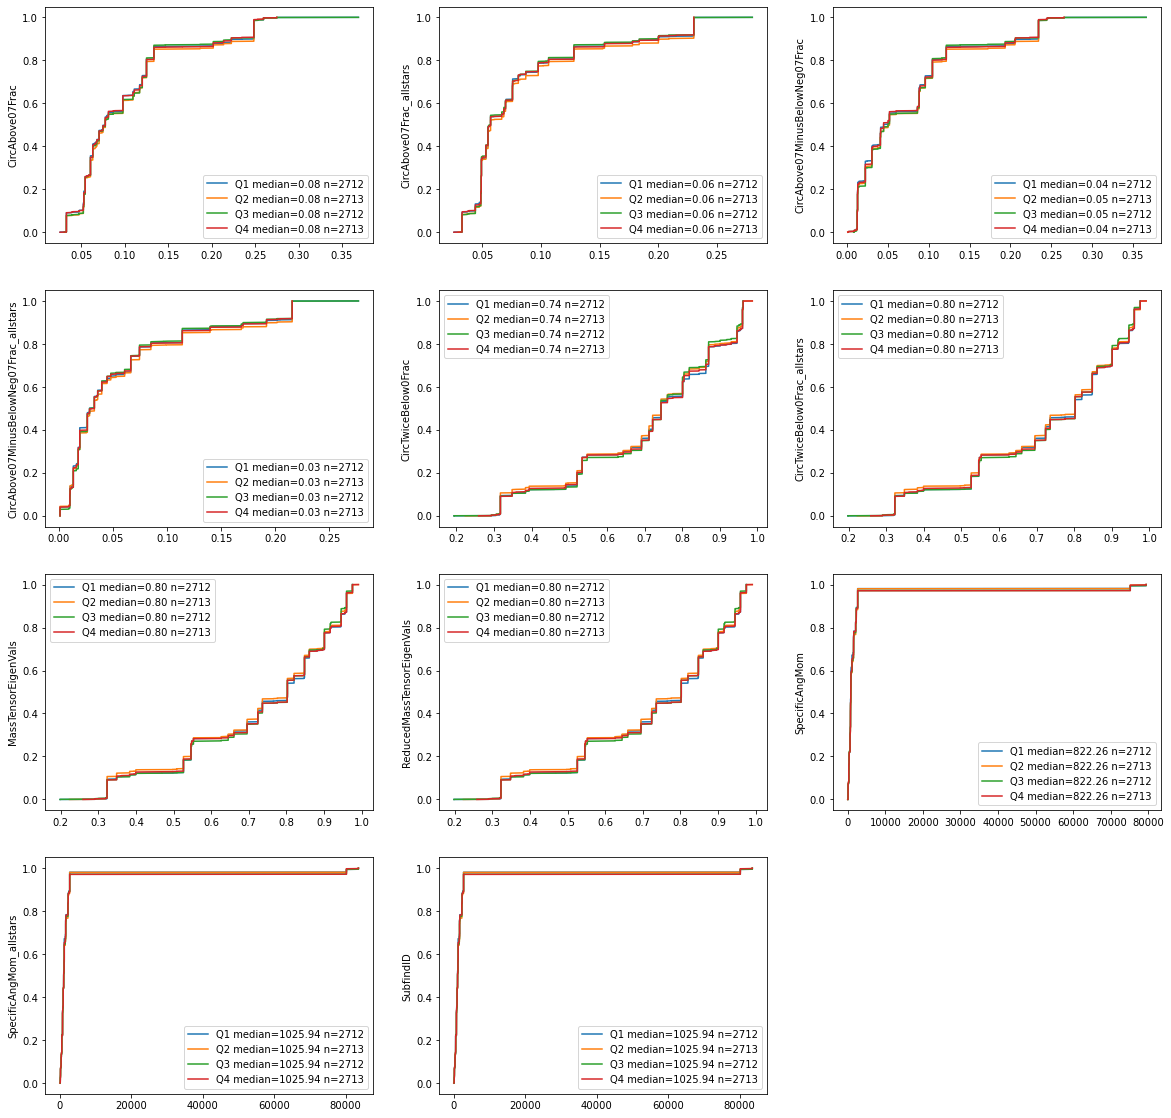

In [278]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(circ_structure_A.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(4,3, i_k+1)
    for i in range(4):
        probe = circ_structure_A[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{} median={:.2f} n={}'.format(i+1, np.median(probe), nn))
    if k=='c200c':
        plt.xlim([0,20])
        
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

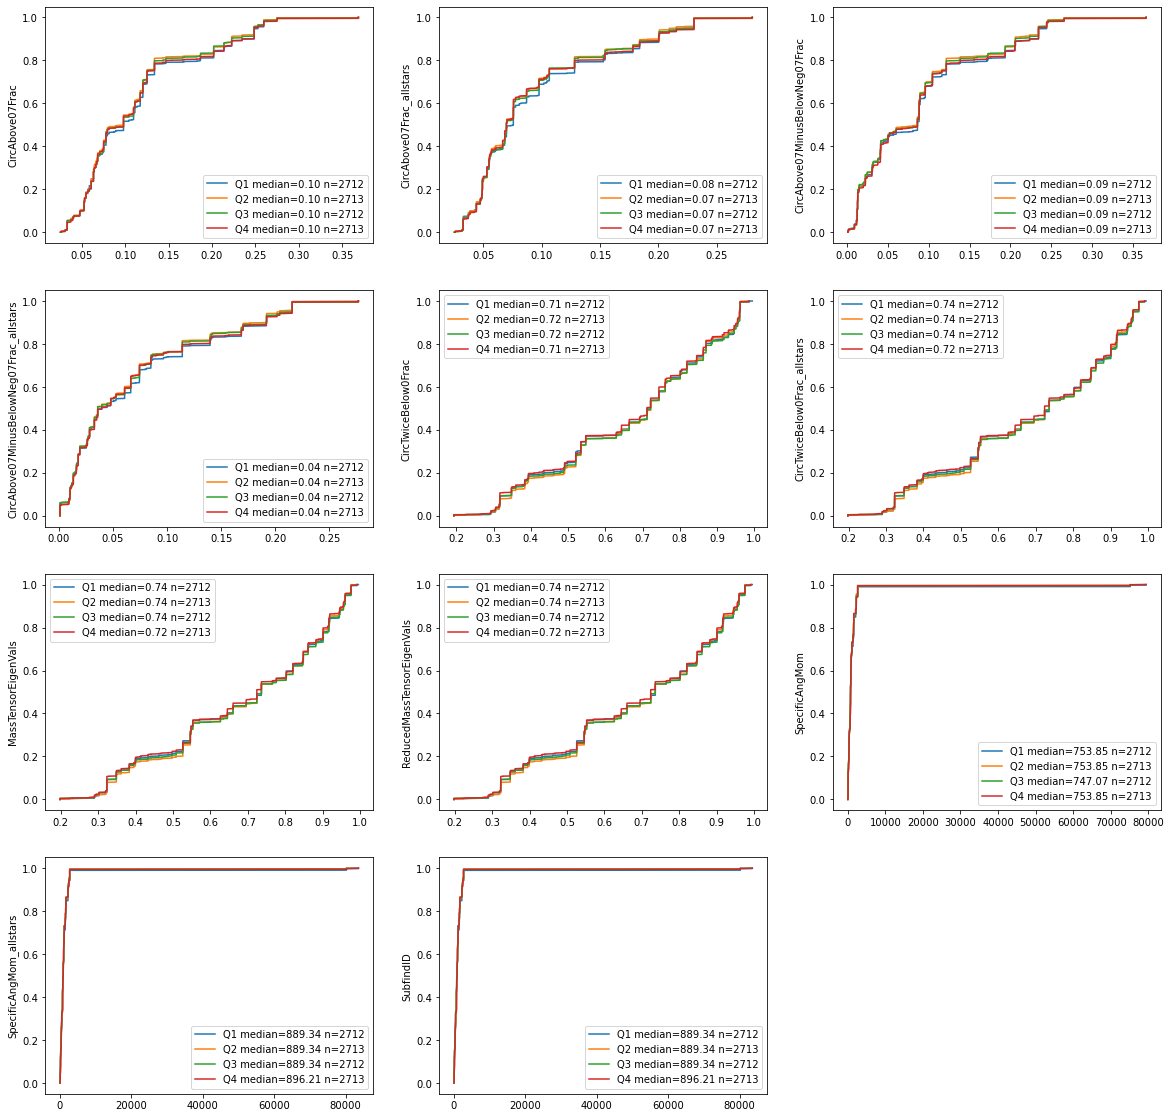

In [279]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(circ_structure_B.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(4,3, i_k+1)
    for i in range(4):
        probe = circ_structure_B[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{} median={:.2f} n={}'.format(i+1, np.median(probe), nn))
    if k=='c200c':
        plt.xlim([0,20])
        
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

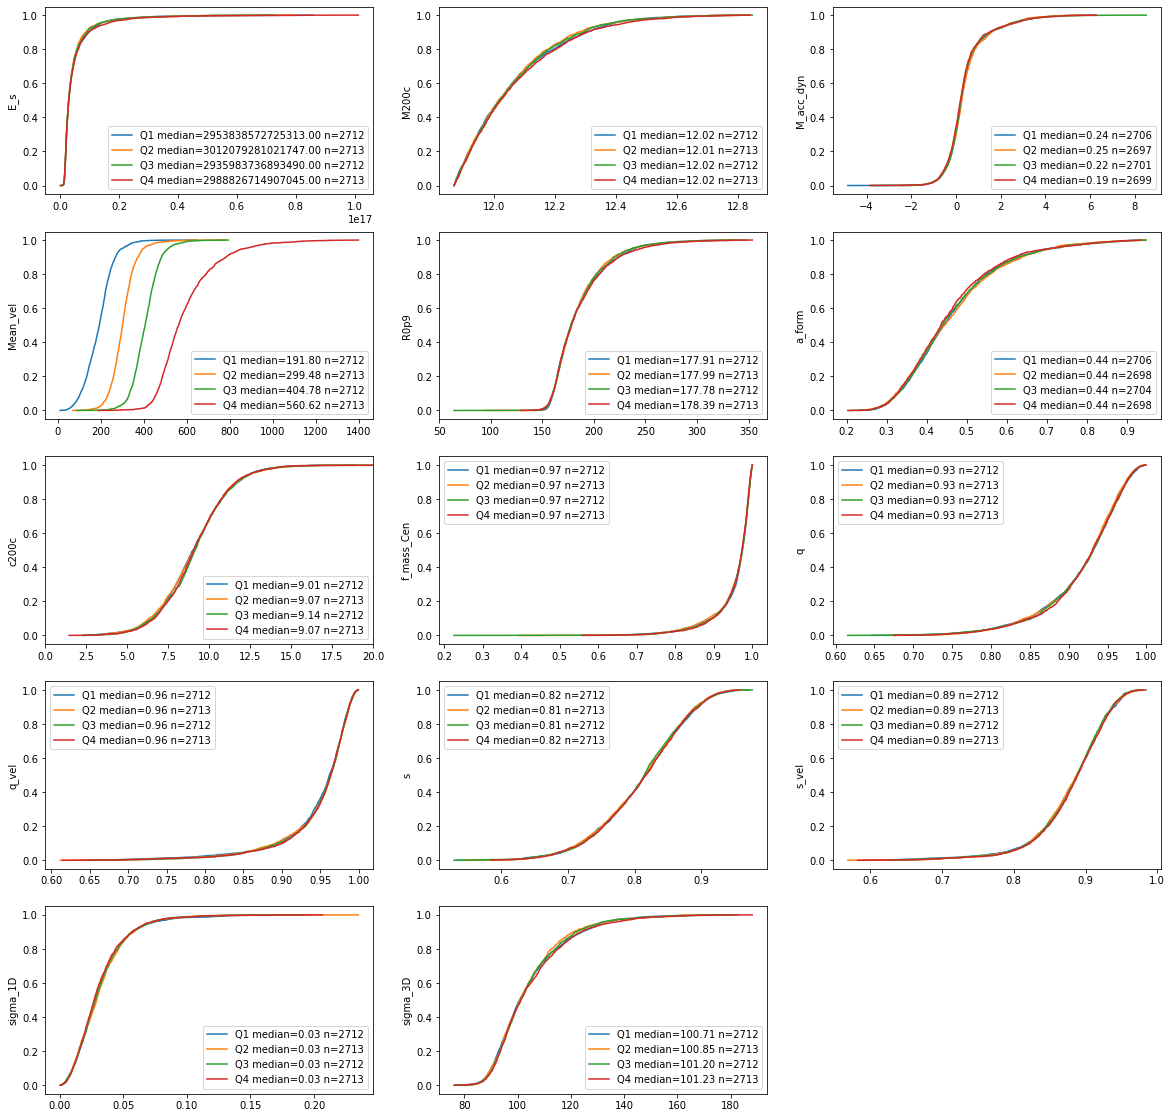

In [280]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(halo_structure_A.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(5,3, i_k+1)
    for i in range(4):
        m = np.mean(halo_structure_A[k][ii_Q[i+1]])
        v = np.mean(pec_vel[ii_Q[i+1]])
        nn = len(pec_vel[ii_Q[i+1]])
        probe = halo_structure_A[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{} median={:.2f} n={}'.format(i+1, np.median(probe), nn))
    if k=='c200c':
        plt.xlim([0,20])
        
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

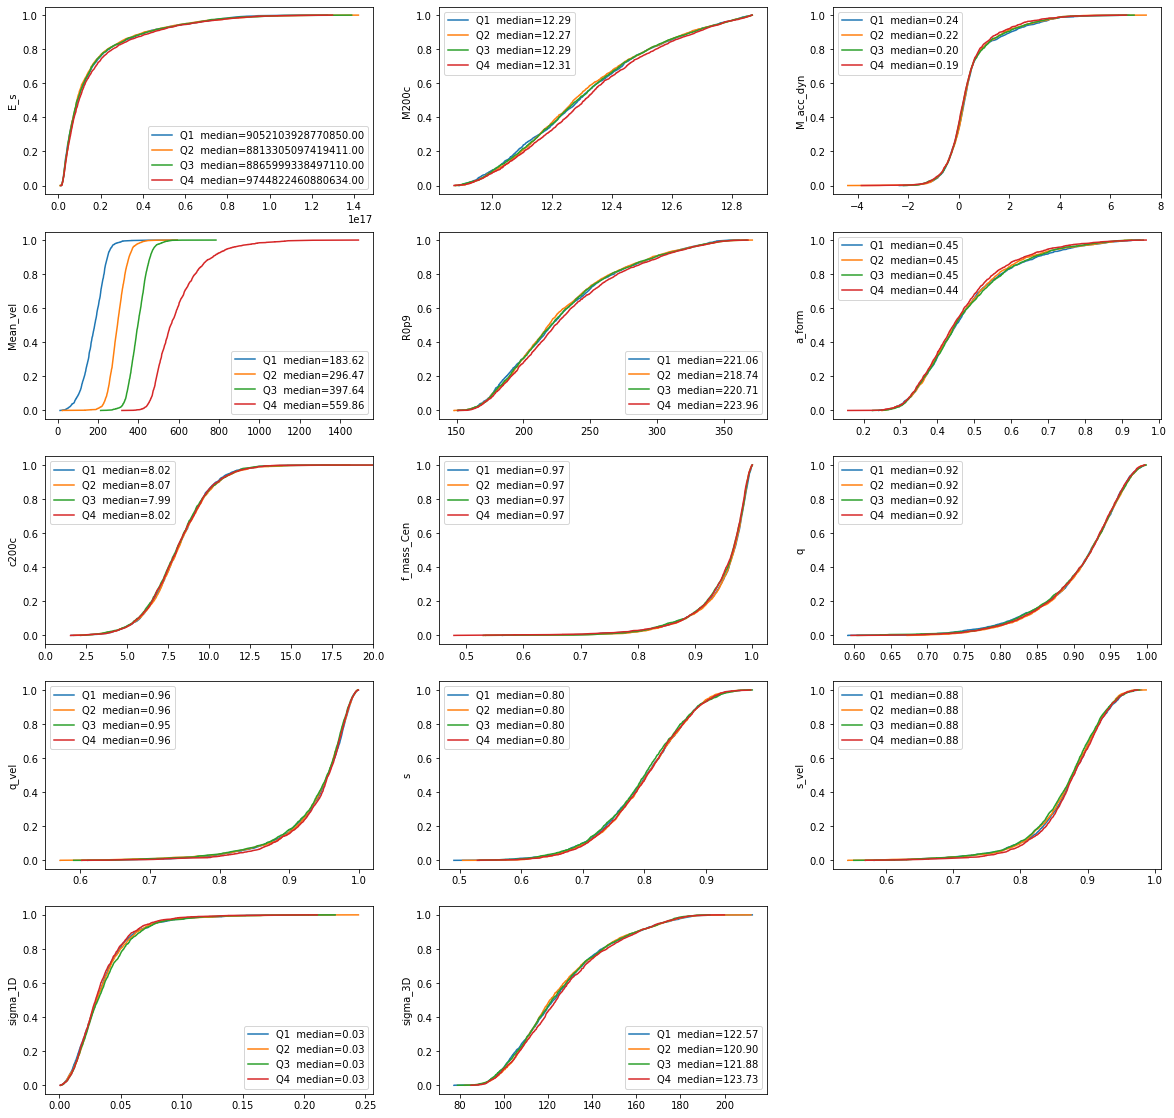

In [281]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(halo_structure_B.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(5,3, i_k+1)
    for i in range(4):
        probe = halo_structure_B[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{}  median={:.2f}'.format(i+1, np.median(probe)))
    if k=='c200c':
        plt.xlim([0,20]) 
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.legend()
    #plt.loglog()

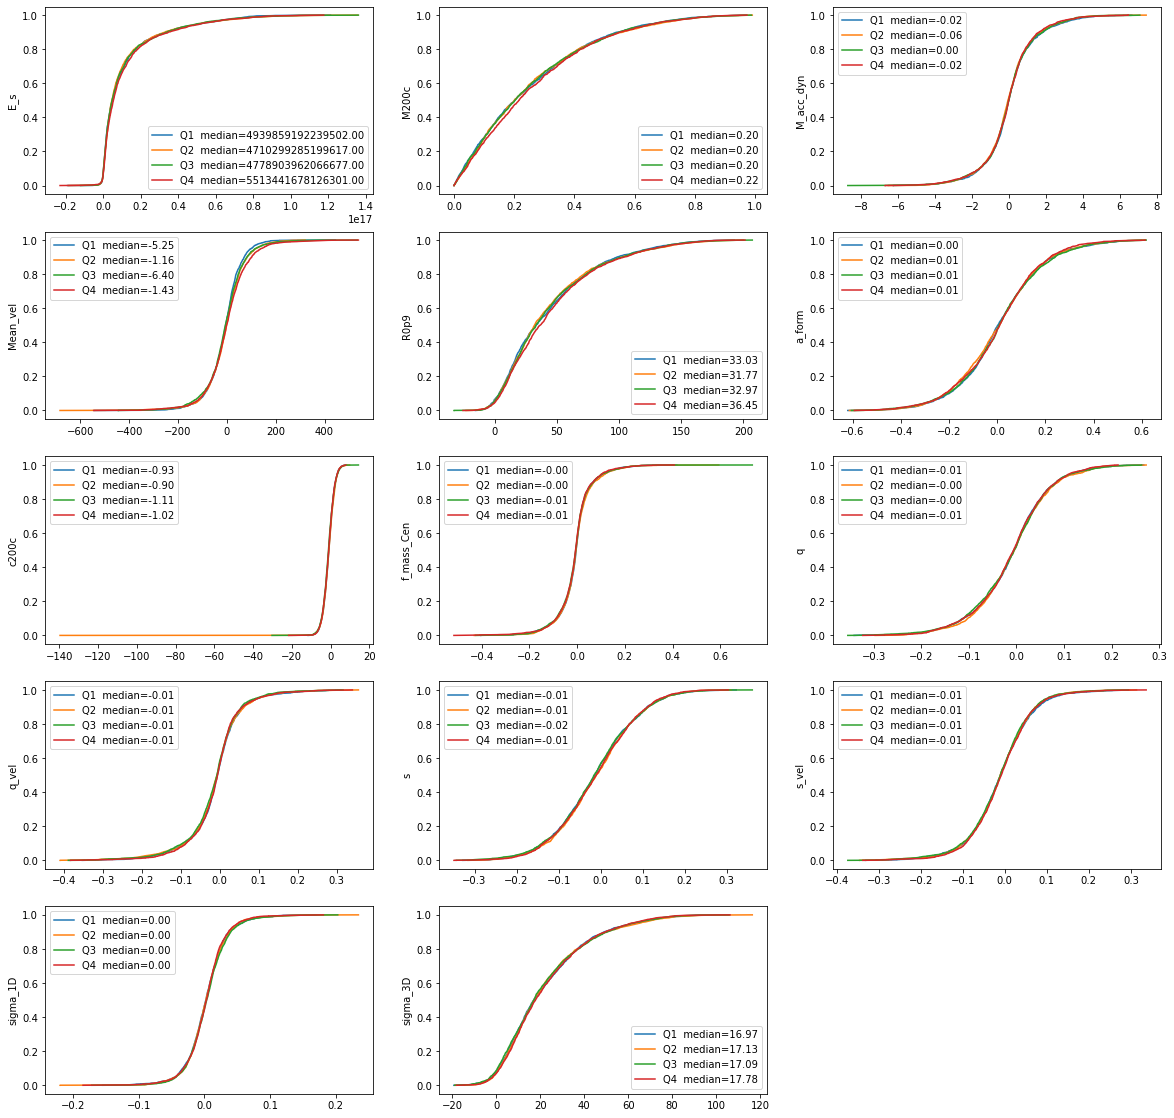

In [282]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(halo_structure_B.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(5,3, i_k+1)
    for i in range(4):
        nn = len(pec_vel[ii_Q[i+1]])
        probe = halo_structure_B[k][ii_Q[i+1]]- halo_structure_A[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn),label='Q{}  median={:.2f}'.format(i+1, np.median(probe)))
        
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

In [343]:
stellar_assembly_file = "../../TNG/TNG300-1/stellar_assembly/stellar_assembly.hdf5"
hf = h5py.File(stellar_assembly_file, 'r')
stellar_structure_A = {}
stellar_structure_B = {}

for k in hf['Snapshot_99'].keys():
        print(k)
        tmp = np.array(hf.get('Snapshot_99/'+k))
        stellar_structure_A[k] = tmp[subhalo_ids[:,0]]
        stellar_structure_B[k] = tmp[subhalo_ids[:,1]]
        print(np.shape(tmp))

hf.close()

StellarMassAfterInfall
(14485709,)
StellarMassBeforeInfall
(14485709,)
StellarMassExSitu
(14485709,)
StellarMassFormedOutsideGalaxies
(14485709,)
StellarMassFromCompletedMergers
(14485709,)
StellarMassFromCompletedMergersMajor
(14485709,)
StellarMassFromCompletedMergersMajorMinor
(14485709,)
StellarMassFromFlybys
(14485709,)
StellarMassFromFlybysMajor
(14485709,)
StellarMassFromFlybysMajorMinor
(14485709,)
StellarMassFromOngoingMergers
(14485709,)
StellarMassFromOngoingMergersMajor
(14485709,)
StellarMassFromOngoingMergersMajorMinor
(14485709,)
StellarMassInSitu
(14485709,)
StellarMassTotal
(14485709,)


In [337]:
stellar_circ_file = "../../TNG/TNG300-1/stellar_circ/stellar_circs.hdf5"
hf = h5py.File(stellar_circ_file, 'r')
print(hf['Snapshot_99'].keys())
stellar_circ_A = {}
stellar_circ_B = {}

subfindid = np.array(hf.get('Snapshot_99/SubfindID'))
for k in hf['Snapshot_99'].keys():

    if k not in ['SubfindID','MassTensorEigenVals', 'ReducedMassTensorEigenVals']:
        print(k)
        tmp = np.array(hf.get('Snapshot_99/'+k))
        print(np.shape(tmp))
        tmp_A = []
        tmp_B = []
        for i in range(len(subhalo_ids)):
            ii_A = (subfindid==subhalo_ids[i,0])
            ii_B = (subfindid==subhalo_ids[i,1])
            #print(tmp[ii_A])
            if np.count_nonzero(ii_A):
                tmp_A.append(tmp[ii_A][0])
            else:
                tmp_A.append(0.0)
            if np.count_nonzero(ii_B):
                tmp_B.append(tmp[ii_B][0])
            else:
                tmp_B.append(0.0)
            #print(tmp_A)

        stellar_circ_A[k] = np.array(tmp_A)
        stellar_circ_B[k] = np.array(tmp_B)

hf.close()

<KeysViewHDF5 ['CircAbove07Frac', 'CircAbove07Frac_allstars', 'CircAbove07MinusBelowNeg07Frac', 'CircAbove07MinusBelowNeg07Frac_allstars', 'CircTwiceBelow0Frac', 'CircTwiceBelow0Frac_allstars', 'MassTensorEigenVals', 'ReducedMassTensorEigenVals', 'SpecificAngMom', 'SpecificAngMom_allstars', 'SubfindID']>
CircAbove07Frac
(303246,)
CircAbove07Frac_allstars
(303246,)
CircAbove07MinusBelowNeg07Frac
(303246,)
CircAbove07MinusBelowNeg07Frac_allstars
(303246,)
CircTwiceBelow0Frac
(303246,)
CircTwiceBelow0Frac_allstars
(303246,)
SpecificAngMom
(303246,)
SpecificAngMom_allstars
(303246,)


CircAbove07Frac
CircAbove07Frac_allstars
CircAbove07MinusBelowNeg07Frac
CircAbove07MinusBelowNeg07Frac_allstars
CircTwiceBelow0Frac
CircTwiceBelow0Frac_allstars
SpecificAngMom
SpecificAngMom_allstars


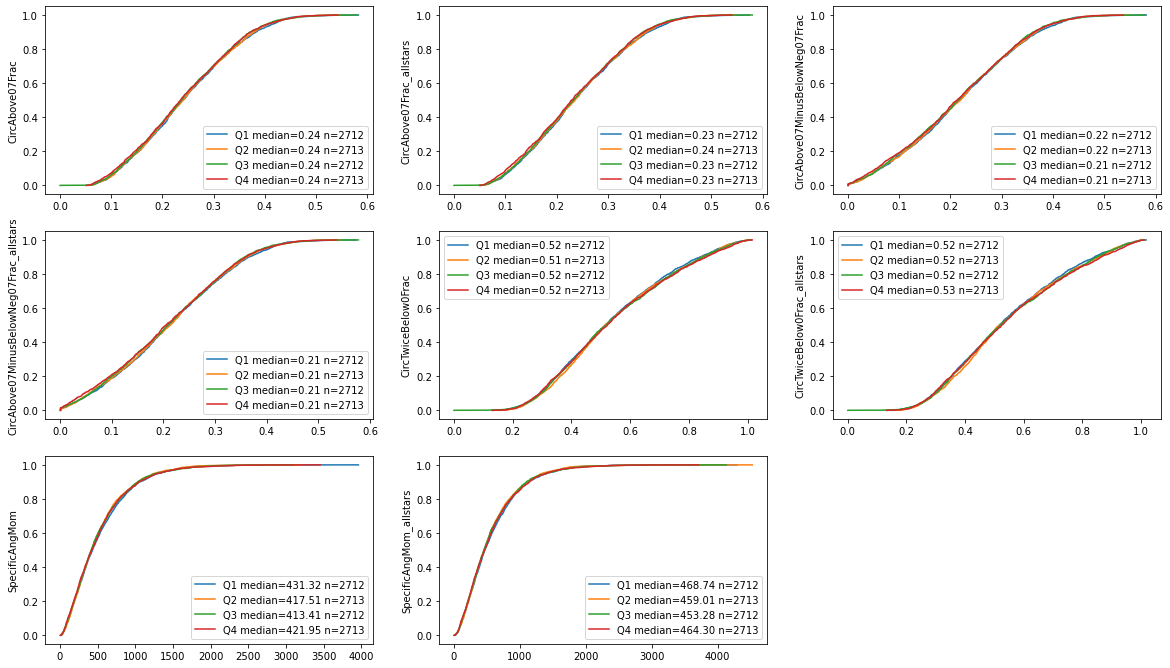

In [344]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(stellar_circ_A.keys()):
    print(k)
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(5,3, i_k+1)
    for i in range(4):
        probe = stellar_circ_A[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{} median={:.2f} n={}'.format(i+1, np.median(probe), nn))
        #plt.semilogx()
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

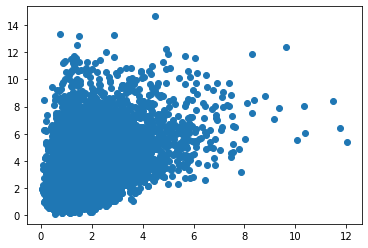

In [284]:
plt.scatter(stellar_structure_A['StellarMassTotal'], stellar_structure_B['StellarMassTotal'])


In [285]:
stellar_structure_A['StellarMassTotal']

array([2.637121 , 2.2145681, 0.3890852, ..., 2.3116434, 1.2254483,
       1.1589833], dtype=float32)

In [286]:
subhalo_ids

array([[1496815,  933074],
       [1918669,  968418],
       [1967706,  970661],
       ...,
       [2052554, 1920661],
       [2062729, 1639909],
       [2065653, 1952221]])

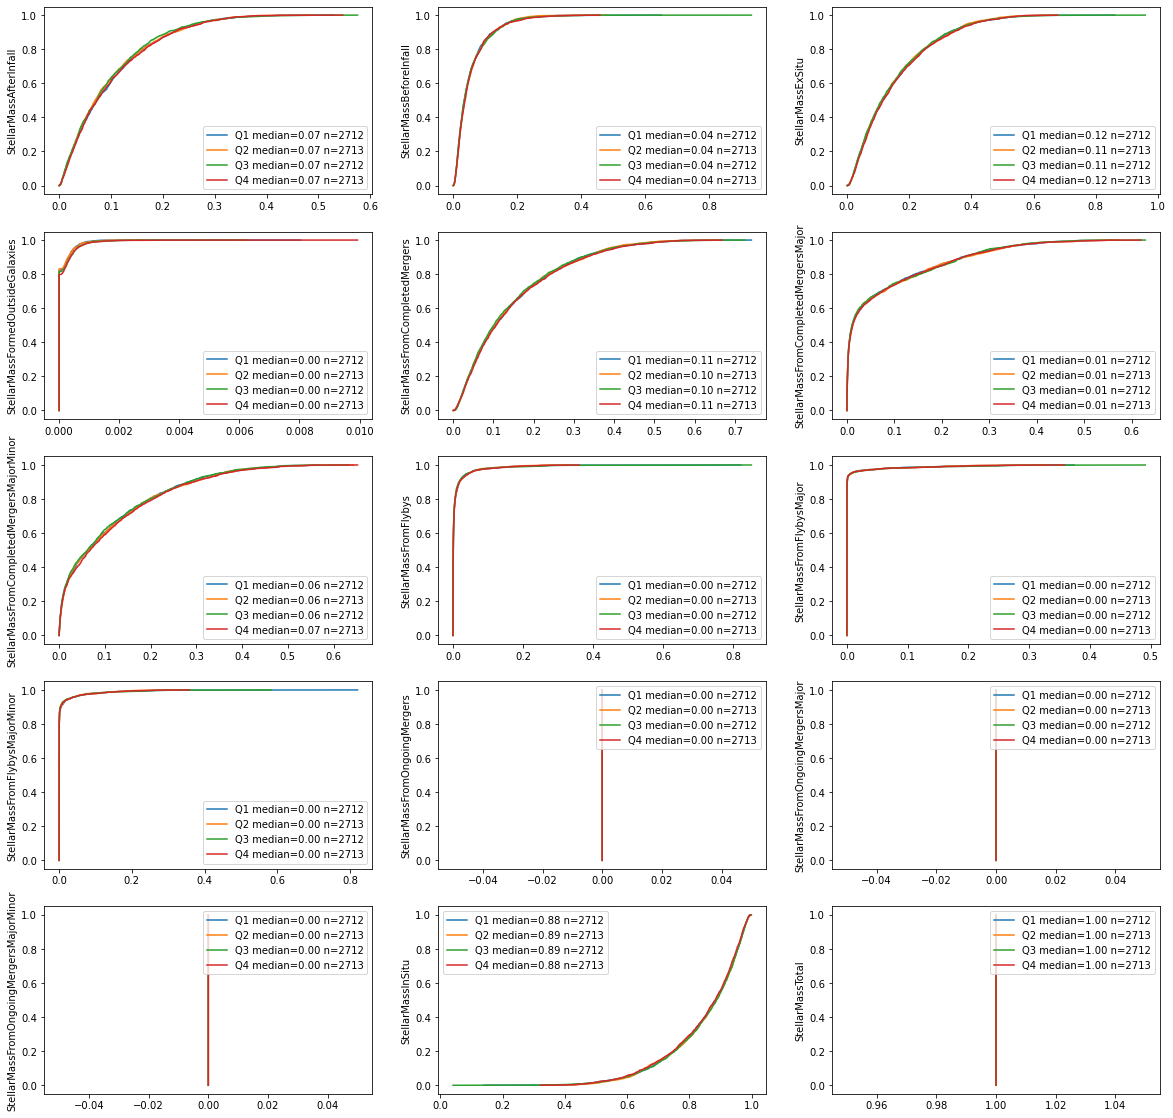

In [345]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(stellar_structure_B.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(5,3, i_k+1)
    for i in range(4):
        probe = stellar_structure_A[k][ii_Q[i+1]]/stellar_structure_A['StellarMassTotal'][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{} median={:.2f} n={}'.format(i+1, np.median(probe), nn))
        #plt.semilogx()
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

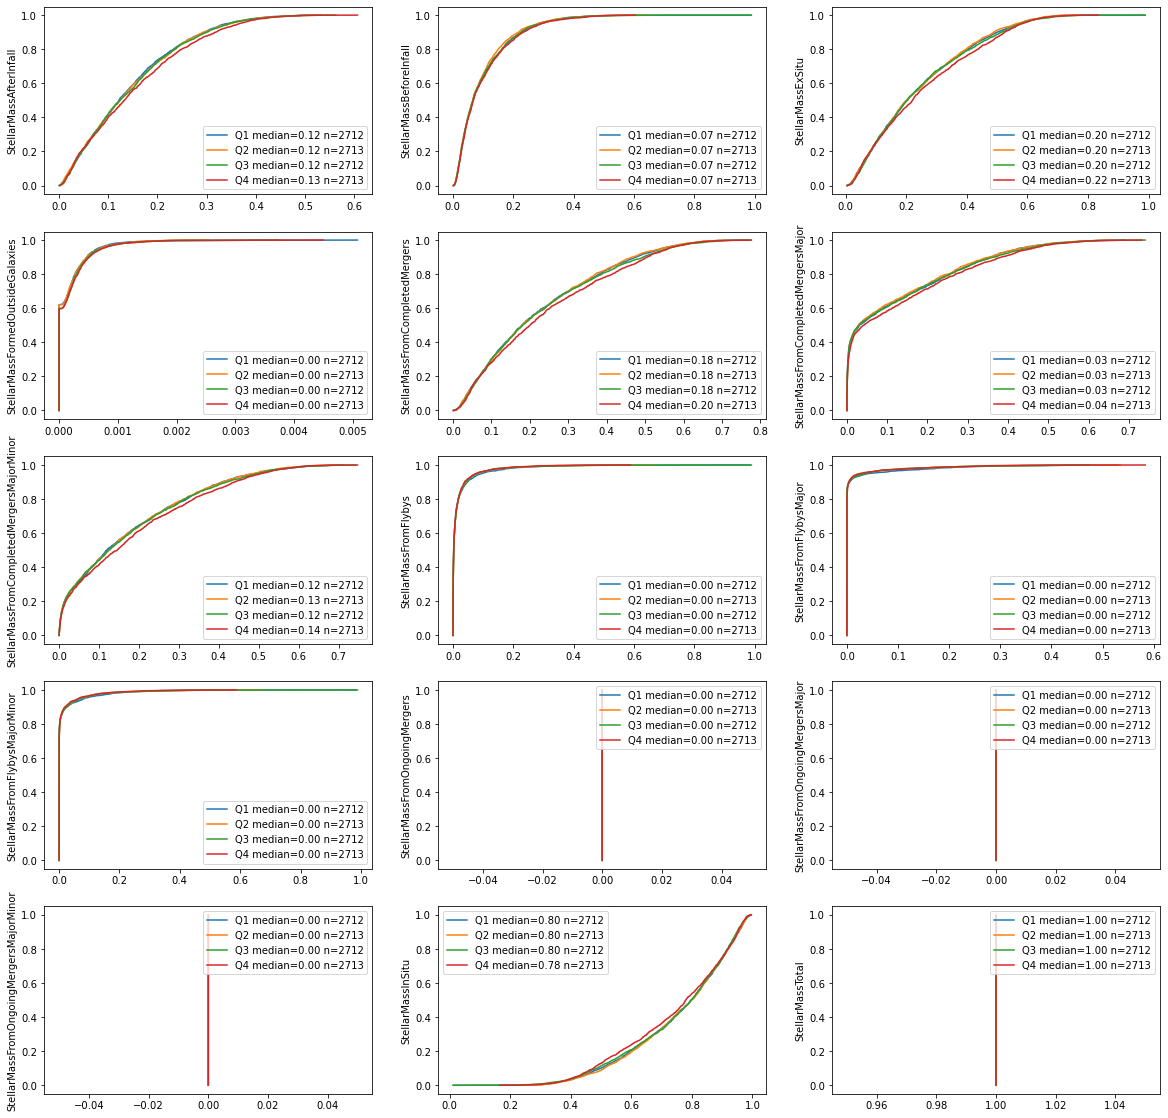

In [346]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(stellar_structure_B.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(5,3, i_k+1)
    for i in range(4):
        probe = stellar_structure_B[k][ii_Q[i+1]]/stellar_structure_B['StellarMassTotal'][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{} median={:.2f} n={}'.format(i+1, np.median(probe), nn))
        #plt.semilogx()
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

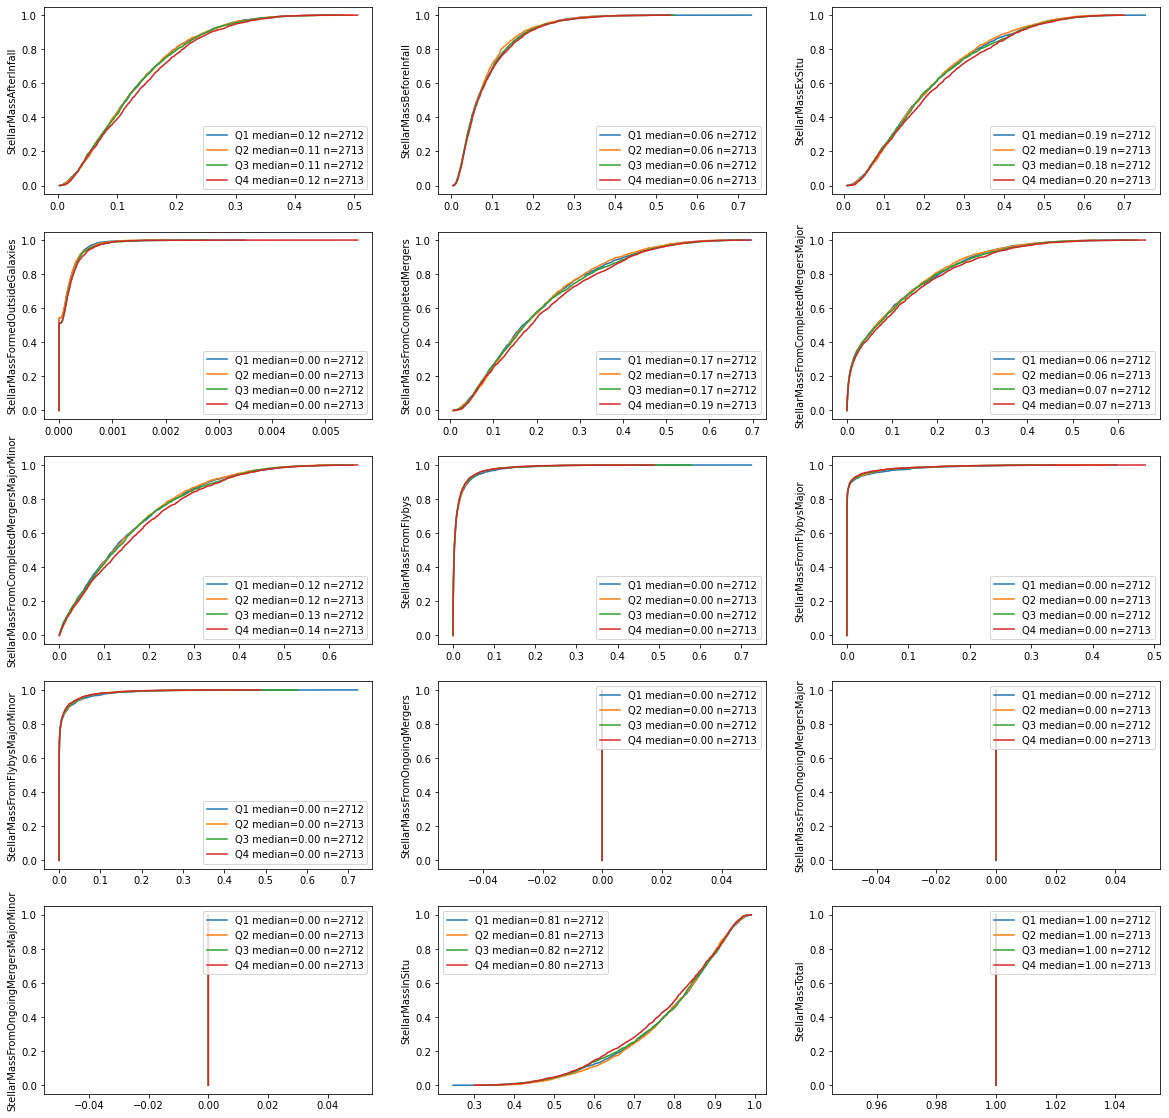

In [347]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(stellar_structure_A.keys()):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(5,3, i_k+1)
    for i in range(4):
        probe = stellar_structure_A[k][ii_Q[i+1]] + stellar_structure_B[k][ii_Q[i+1]]
        probe = probe/(stellar_structure_A['StellarMassTotal'][ii_Q[i+1]] + stellar_structure_B['StellarMassTotal'][ii_Q[i+1]])
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{} median={:.2f} n={}'.format(i+1, np.median(probe), nn))
        #plt.semilogx()
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.loglog()

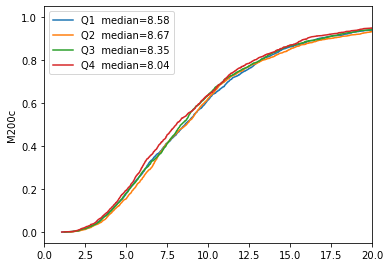

In [348]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(['M200c']):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(4,3, i_k+1)
    for i in range(4):
        probe = halo_structure_A[k][ii_Q[i+1]]/stellar_structure_A['StellarMassTotal'][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{}  median={:.2f}'.format(i+1, np.median(probe)))
    if k=='c200c':
        plt.xlim([0,30]) 
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    plt.xlim([0,20])
    #plt.legend()
    #plt.loglog()

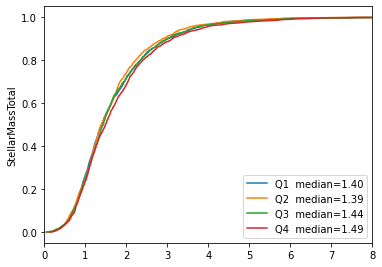

In [353]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(['StellarMassTotal']):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(4,3, i_k+1)
    for i in range(4):
        probe = stellar_structure_A[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{}  median={:.2f}'.format(i+1, np.median(probe)))
    if k=='c200c':
        plt.xlim([0,30]) 
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    plt.xlim([0,8])
    #plt.legend()
    #plt.loglog()

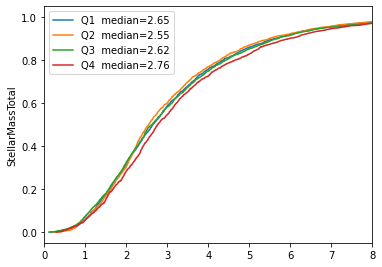

In [354]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(['StellarMassTotal']):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(4,3, i_k+1)
    for i in range(4):
        probe = stellar_structure_B[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{}  median={:.2f}'.format(i+1, np.median(probe)))
    if k=='c200c':
        plt.xlim([0,30]) 
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    plt.xlim([0,8])
    #plt.legend()
    #plt.loglog()

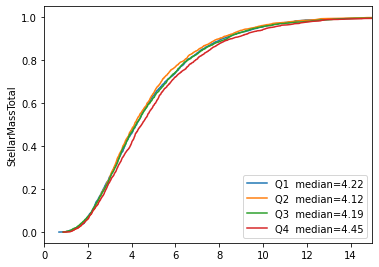

In [358]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(['StellarMassTotal']):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(4,3, i_k+1)
    for i in range(4):
        probe = stellar_structure_B[k][ii_Q[i+1]]+stellar_structure_A[k][ii_Q[i+1]]
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{}  median={:.2f}'.format(i+1, np.median(probe)))
    if k=='c200c':
        plt.xlim([0,30]) 
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    plt.xlim([0,15])
    #plt.legend()
    #plt.loglog()

In [350]:
stellar_structure_A

{'StellarMassAfterInfall': array([0.38127956, 0.00249305, 0.00206144, ..., 0.09757781, 0.01313286,
        0.0032866 ], dtype=float32),
 'StellarMassBeforeInfall': array([0.37090516, 0.01605112, 0.00525482, ..., 0.03760583, 0.02731447,
        0.00521559], dtype=float32),
 'StellarMassExSitu': array([0.75218457, 0.01854416, 0.00731626, ..., 0.13614346, 0.04152722,
        0.0085022 ], dtype=float32),
 'StellarMassFormedOutsideGalaxies': array([0.        , 0.        , 0.        , ..., 0.0009598 , 0.00107989,
        0.        ], dtype=float32),
 'StellarMassFromCompletedMergers': array([0.28604916, 0.01781037, 0.00614886, ..., 0.13518366, 0.03981978,
        0.0085022 ], dtype=float32),
 'StellarMassFromCompletedMergersMajor': array([0.00118782, 0.00112571, 0.00306141, ..., 0.02323494, 0.01499494,
        0.00552313], dtype=float32),
 'StellarMassFromCompletedMergersMajorMinor': array([0.26676914, 0.00219257, 0.00471625, ..., 0.05802884, 0.01891114,
        0.00552313], dtype=float32),


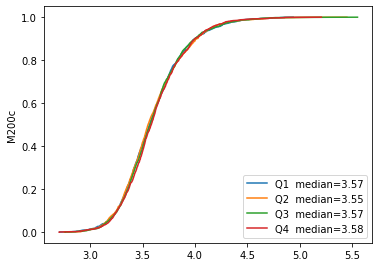

In [291]:
plt.figure(figsize=(20,20))
for i_k, k in enumerate(['M200c']):
    
    ii_sorted = np.argsort(pec_vel)
    n = len(pec_vel)
    ii_Q = {}
    ii_Q[1] = ii_sorted[:n//4]
    ii_Q[2] = ii_sorted[n//4:n//2]
    ii_Q[3] = ii_sorted[n//2:-n//4]
    ii_Q[4] = ii_sorted[-n//4:]
    

    plt.subplot(4,3, i_k+1)
    for i in range(4):
        probe = np.log10(halo_structure_A['sigma_3D'][ii_Q[i+1]]/halo_structure_A['sigma_1D'][ii_Q[i+1]])
        probe = probe[~np.isnan(probe)]
        nn = len(probe)
        plt.plot(np.sort(probe), np.linspace(0., 1., nn), label='Q{}  median={:.2f}'.format(i+1, np.median(probe)))
    if k=='c200c':
        plt.xlim([0,20]) 
    #plt.scatter(pec_vel, halo_structure_B[k], alpha=0.1, label='R={}'.format(R[0,1]))
    plt.ylabel(k)
    plt.legend()
    #plt.legend()
    #plt.loglog()

In [292]:
pos = np.loadtxt("../data/summary_subhalo_pos_TNG300-1.dat")

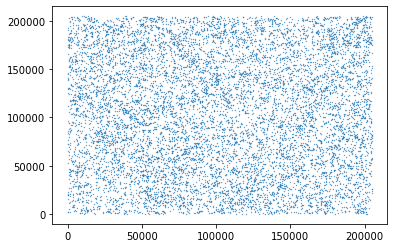

In [293]:
plt.scatter(pos[:,0], pos[:,2], s=0.1)